In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [35]:
# Load the dataset
file_path = '/Users/theranmeadows/Desktop/churn_project/WA_Fn-UseC_-Telco-Customer-Churn - WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

In [36]:
# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
# Display the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [38]:
# Check for missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [39]:
# Convert 'Churn' to numeric
data['Churn'] = data['Churn'].map({'No': 0, 'Yes': 1})

In [40]:
# Handle missing values (if any)
# For simplicity, we'll drop rows with missing values
data.dropna(inplace=True)

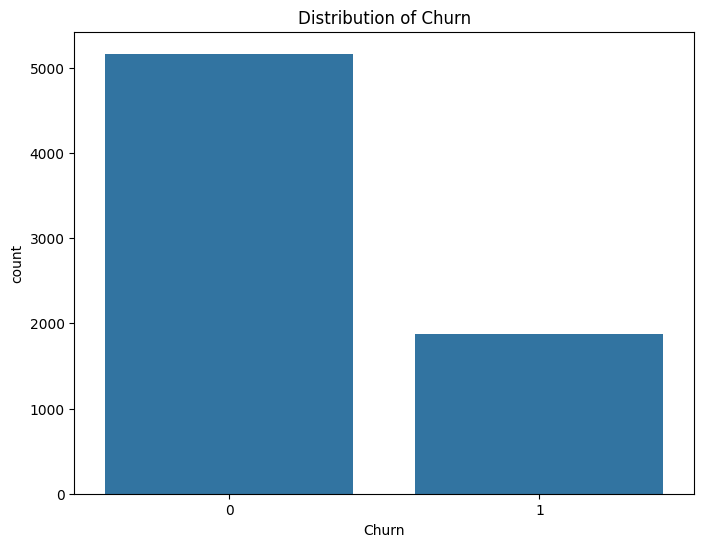

In [41]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Churn')
plt.title('Distribution of Churn')
plt.show()

In [46]:
# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [43]:
# Visualize the distribution of categorical features
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

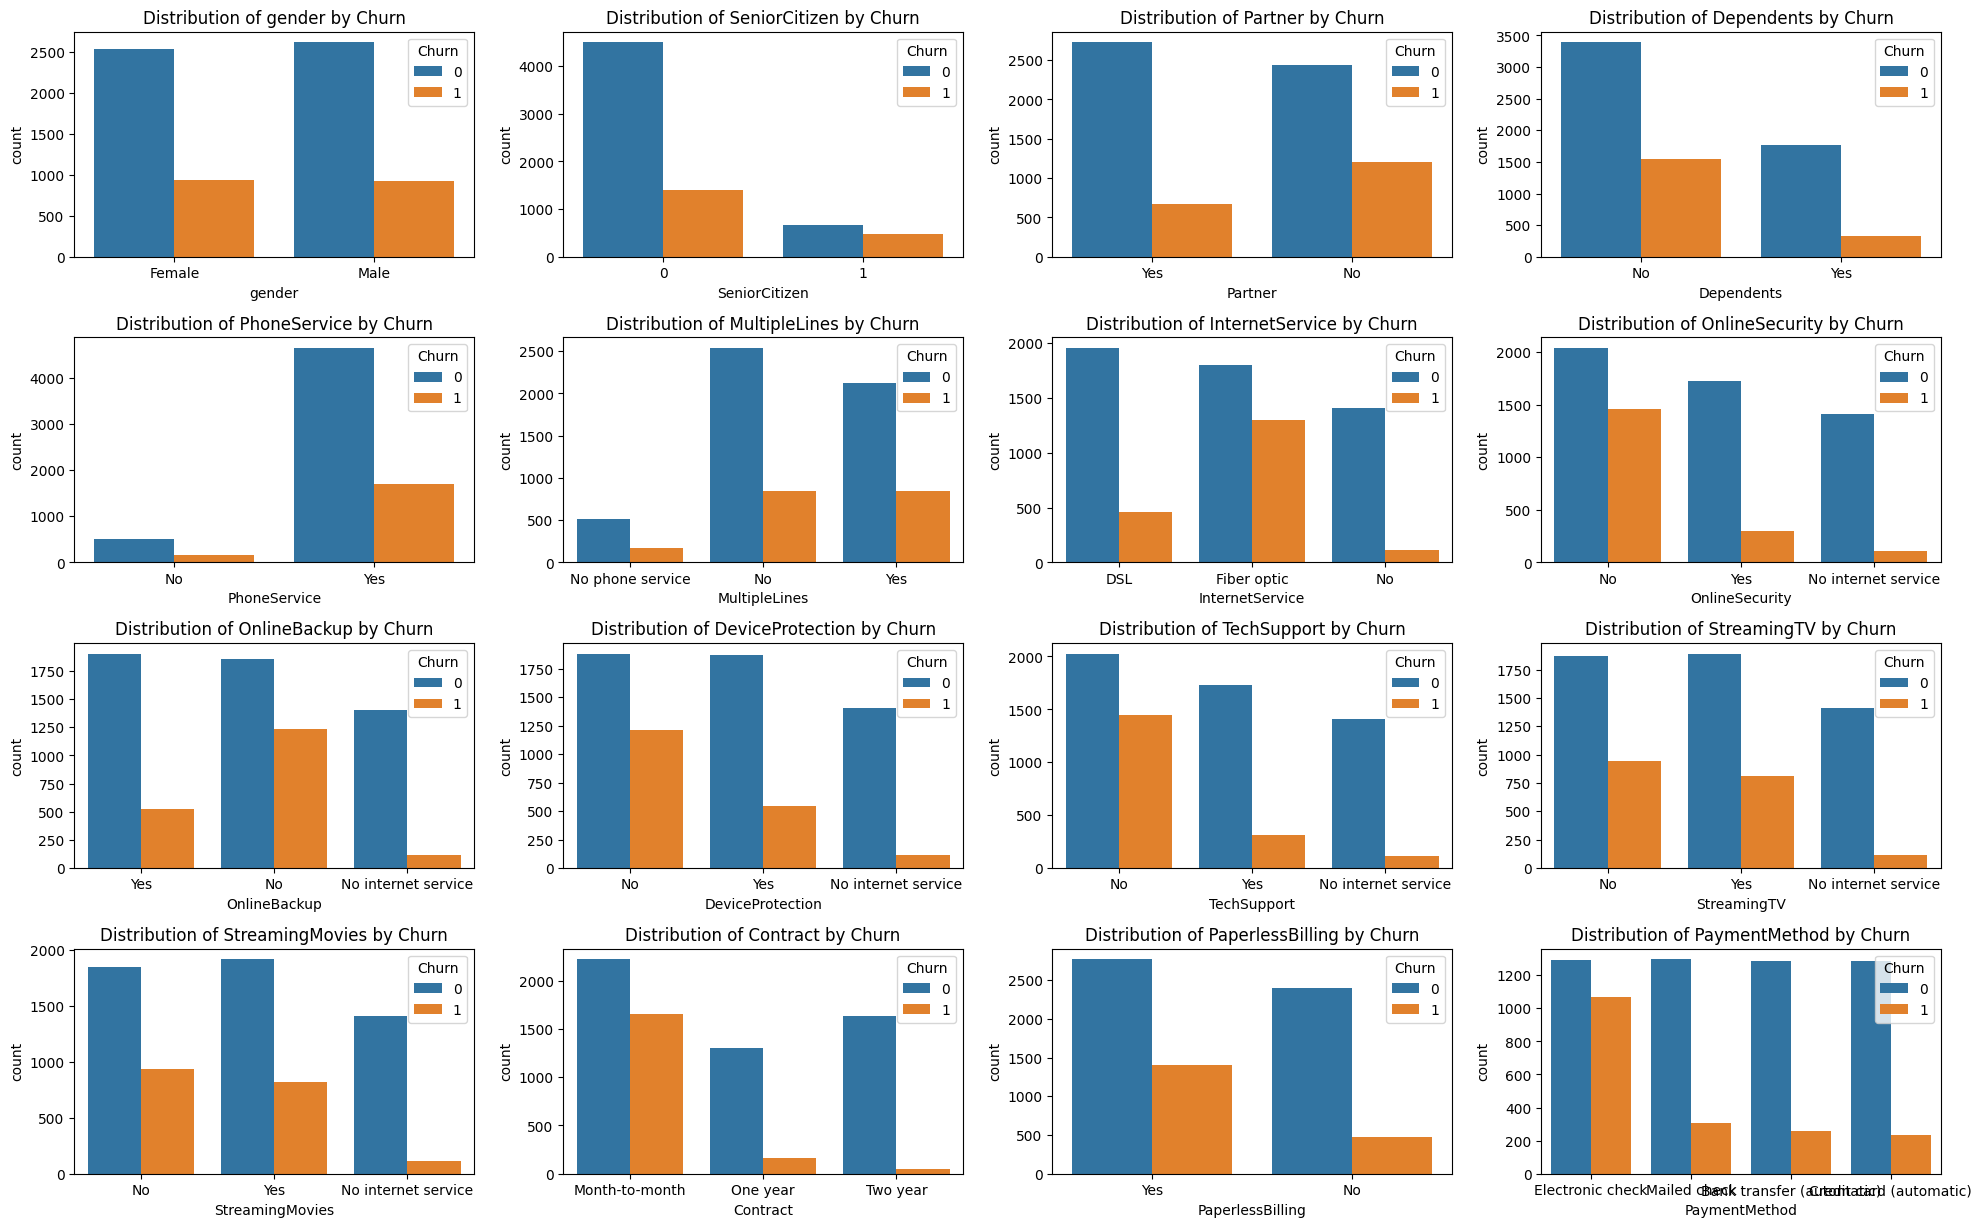

In [44]:
plt.figure(figsize=(20, 15))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    sns.countplot(data=data, x=feature, hue='Churn')
    plt.title(f'Distribution of {feature} by Churn')
plt.tight_layout()
plt.show()

In [49]:
cramers_v_results = {}

for feature in categorical_features:
    confusion_matrix = pd.crosstab(data[feature], data['Churn'])
    cramers_v_results[feature] = cramers_v(confusion_matrix.values)



In [50]:
# Convert the results to a DataFrame for better visualization
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['CramersV'])



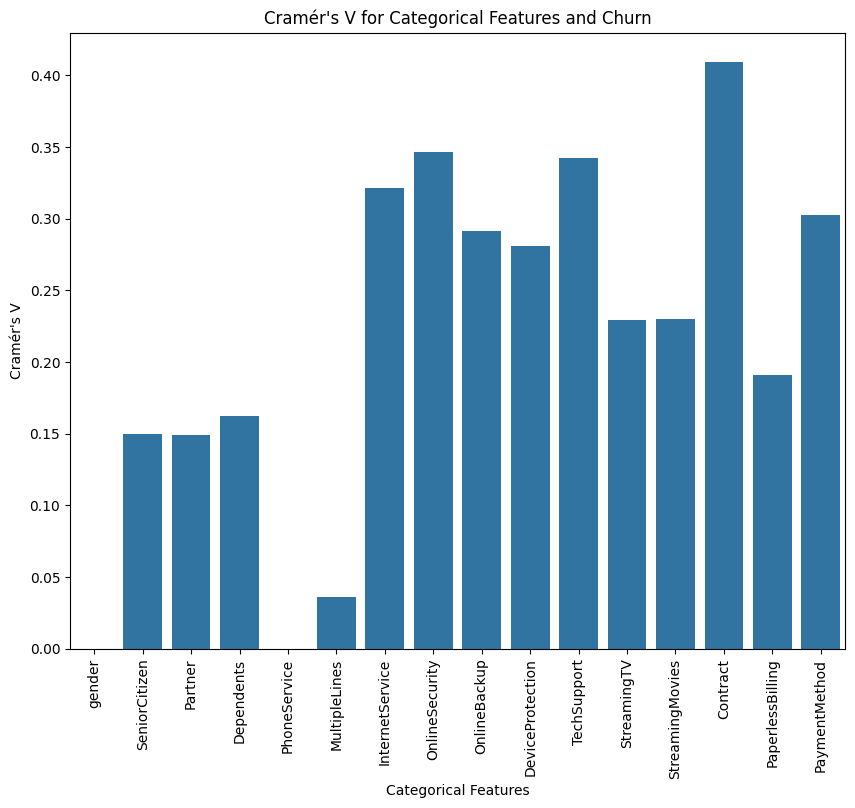

In [51]:
# Plot the results
plt.figure(figsize=(10, 8))
sns.barplot(x=cramers_v_df.index, y='CramersV', data=cramers_v_df)
plt.xticks(rotation=90)
plt.title("Cramér's V for Categorical Features and Churn")
plt.xlabel('Categorical Features')
plt.ylabel("Cramér's V")
plt.show()

In [28]:
# Visualize the distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

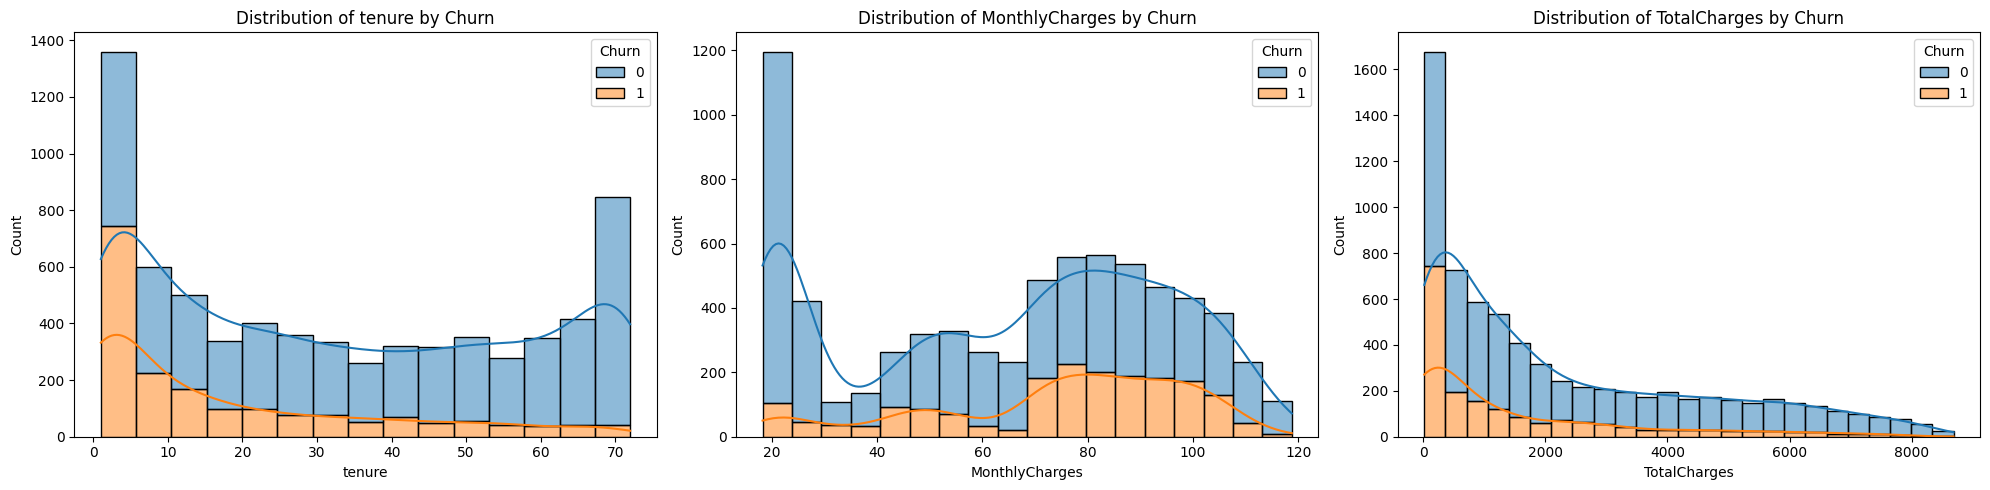

In [29]:
plt.figure(figsize=(20, 5))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=data, x=feature, kde=True, hue='Churn', multiple="stack")
    plt.title(f'Distribution of {feature} by Churn')
plt.tight_layout()
plt.show()

In [30]:
# Convert TotalCharges to numeric (handle errors)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')



In [31]:
# Fill missing TotalCharges with 0 (if any)
data['TotalCharges'].fillna(0, inplace=True)


/var/folders/s0/wl7p7mcx5_n53vpctx2yyx180000gn/T/ipykernel_30242/277714336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(0, inplace=True)


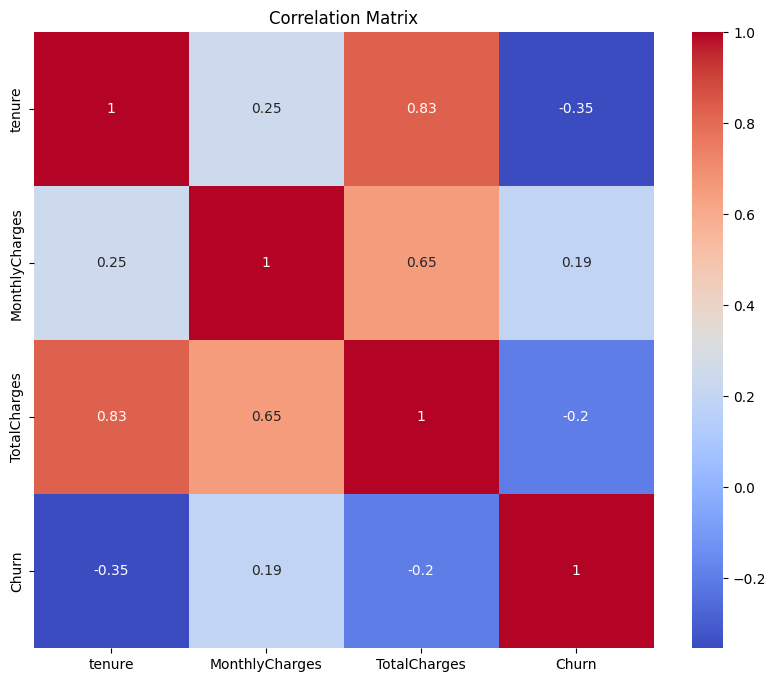

In [32]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_features + ['Churn']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()